In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import sklearn
print('scikit-learn version\n', sklearn.__version__)
from sklearn.model_selection import train_test_split
import pickle
import dtale
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer

scikit-learn version
 1.0.2


In [2]:
seed=41

# Load Dataset

In [3]:
df = pd.read_pickle('../Dataset_Preprocessed.pkl').drop(columns=['InChIKey', 'Chemical Formula'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290039 entries, 0 to 290038
Columns: 137 entries, Kingdom to N/P
dtypes: float64(133), object(4)
memory usage: 303.2+ MB


In [13]:
dtale.show(df[['Kingdom', 'Superclass', 'Class', 'Subclass']].drop_duplicates(), host='localhost')

In [21]:
uclass = df[['Superclass', 'Class']].drop_duplicates()['Superclass'].value_counts()
pickle.dump(list(uclass[uclass==1].index), open('Dataset/SC_wunique_child.pkl', 'wb')) #Superclasses w unique child
uclass = df[['Class', 'Subclass']].drop_duplicates()['Class'].value_counts()
pickle.dump(list(uclass[uclass==1].index), open('Dataset/C_wunique_child.pkl', 'wb')) #Classes w unique child
all_categ = {'Kingdom': np.unique(df.iloc[:, 0]), 'Superclass': np.unique(df.iloc[:, 1]), 
               'Class': np.unique(df.iloc[:, 2]), 'Subclass': np.unique(df.iloc[:, 3])}
pickle.dump(all_categ, open('Dataset/all_categories.pkl', 'wb')) #all categories in the dataset

In [15]:
columns = list(df.columns)
print(', '.join(list(df.columns)), end='\n\n')
df.info()

Kingdom, Superclass, Class, Subclass, C, H, O, P, N, S, Th, Cm, K, Na, Rb, Li, Cs, Fr, Ca, Mg, Be, Sr, Ba, Ce, La, Nd, Gd, Sm, Eu, Lu, Pr, Tb, Dy, Ho, Er, Tm, Te, Si, As, B, Ge, Sb, Al, Bi, Cr, Co, Cu, Fe, Mo, Mn, Zr, Ti, W, Ni, V, Ag, Hg, Cd, Au, Ta, Y, Ru, Pd, Pt, Re, Zn, Hf, Nb, Sc, Os, Ir, Cl, I, F, Br, He, Ar, Se, Ga, Sn, Tl, Pb, Xe, Rn, Ra, Pu, Kr, U, Tc, At, In, Po, Ne, Ac, Rf, Db, Sg, Bh, Hs, Rh, Mt, Ds, Rg, Pm, Yb, Pa, Np, Am, Bk, Cf, Es, Fm, Md, No, Lr, Cn, Fl, Lv, Mc, Nh, Ts, Charge, Mass, Halogens, All Metals, Alkaline Metals, Alkaline Earth Metals, Transition Metals, Post Transition Metals, Lanthanoids, Actinoids, Synthetics, O/C, H/C, N/C, P/C, N/P

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290039 entries, 0 to 290038
Columns: 137 entries, Kingdom to N/P
dtypes: float64(133), object(4)
memory usage: 303.2+ MB


# Split data to Train and Test

In [16]:
feature_names = list(df.columns)[4:] #all features
pickle.dump(feature_names, open('Dataset/feature_names.pkl', 'wb'))

#Splitting the data into independent and dependent variables
X = df.iloc[:, 4:].values
y = df.iloc[:, 0:4].values

#Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.33, random_state = seed)

pickle.dump(X_train, open(f'Dataset/X_train.pkl', 'wb'))
pickle.dump(X_test, open(f'Dataset/X_test.pkl', 'wb'))
pickle.dump(y_train, open(f'Dataset/y_train.pkl', 'wb'))
pickle.dump(y_test, open(f'Dataset/y_test.pkl', 'wb'))

### Scaling (final preprocessing step)

In [6]:
X_train = pickle.load(open(f'Dataset/X_train.pkl', 'rb'))
X_test = pickle.load(open(f'Dataset/X_test.pkl', 'rb'))
y_train = pickle.load(open(f'Dataset/y_train.pkl', 'rb'))
y_test = pickle.load(open(f'Dataset/y_test.pkl', 'rb'))

In [15]:
X_train_df = pd.DataFrame(X_train, columns=feature_names)

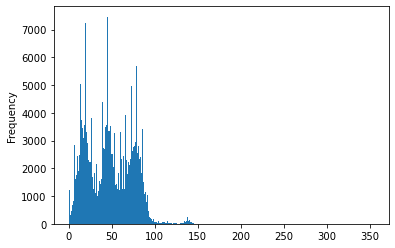

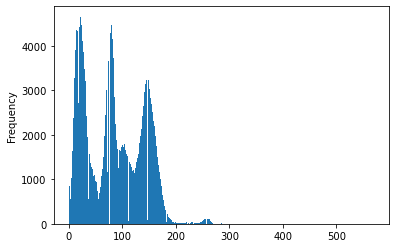

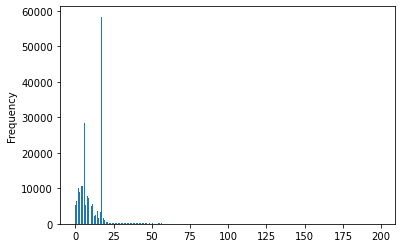

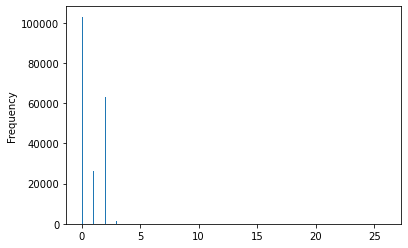

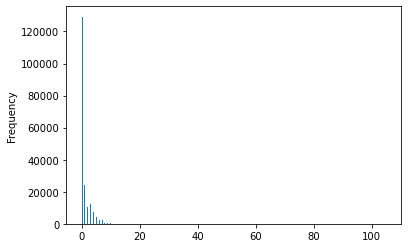

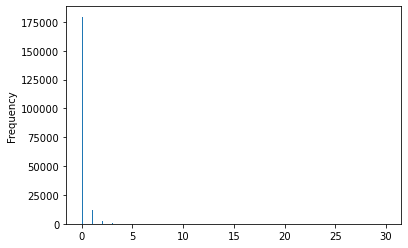

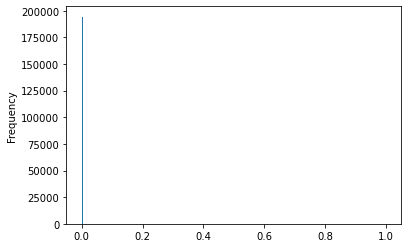

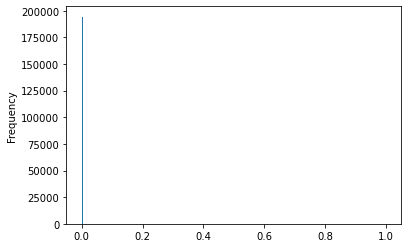

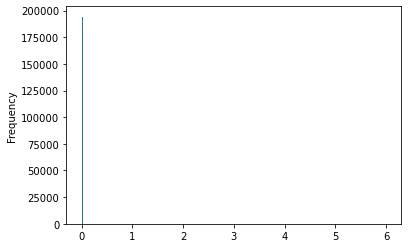

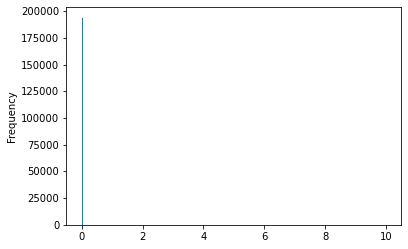

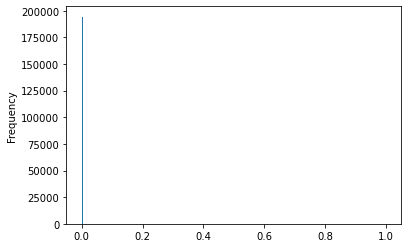

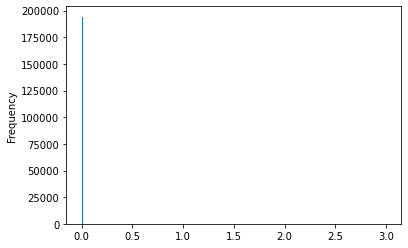

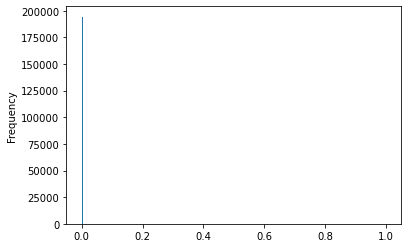

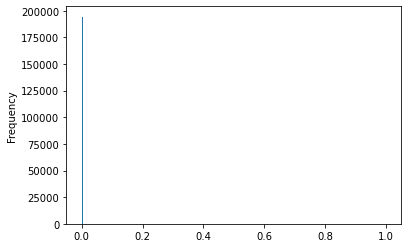

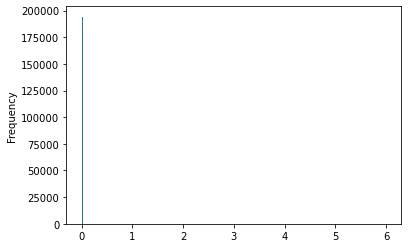

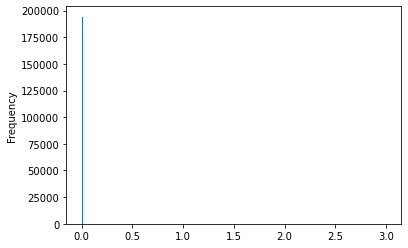

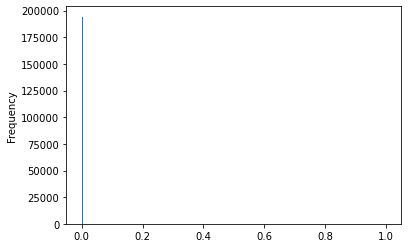

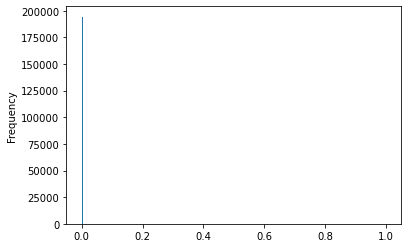

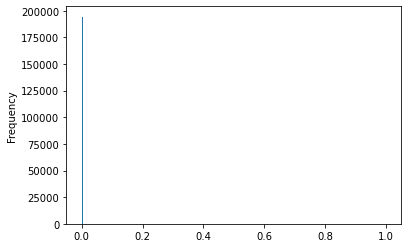

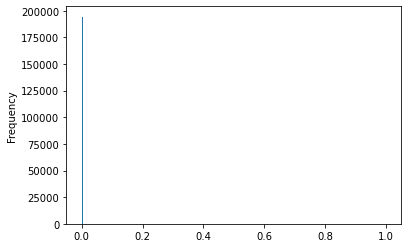

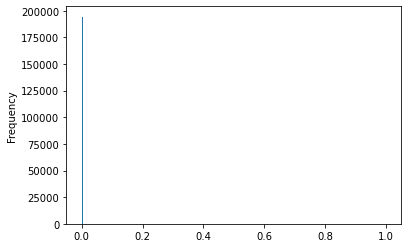

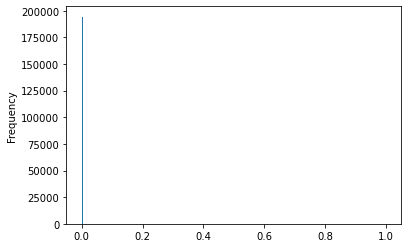

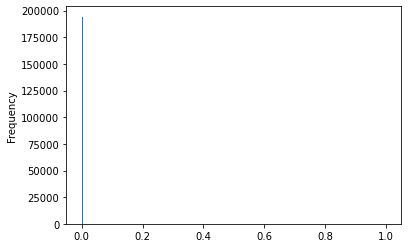

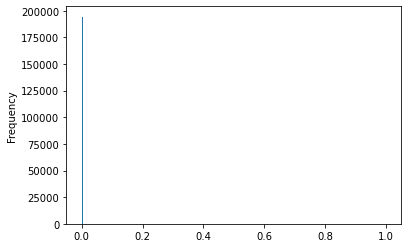

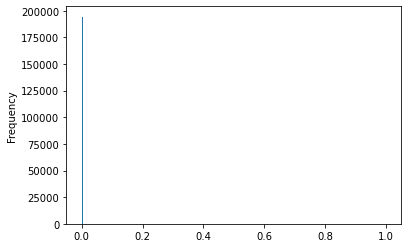

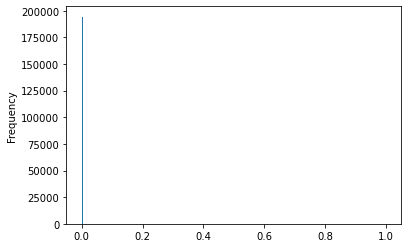

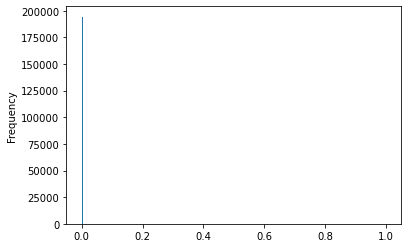

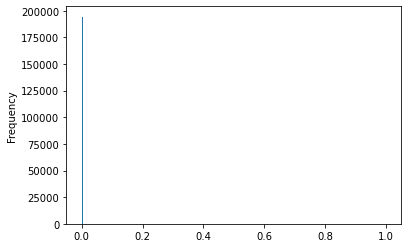

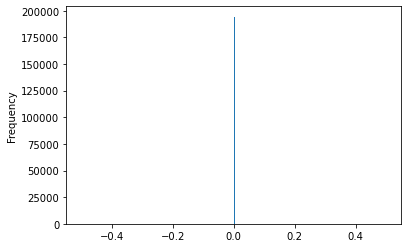

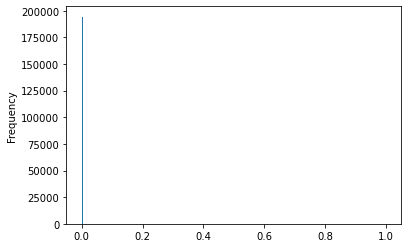

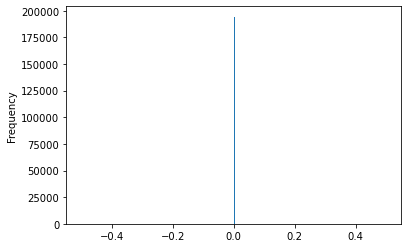

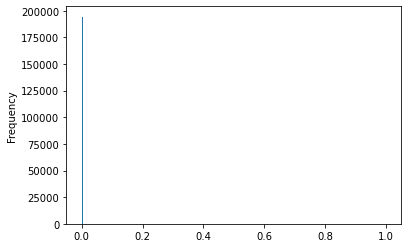

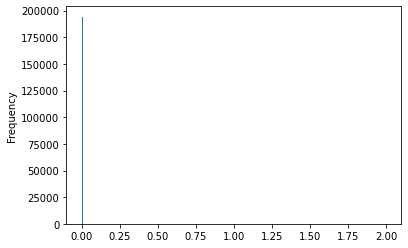

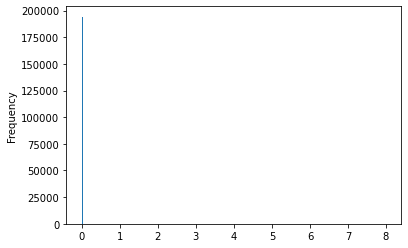

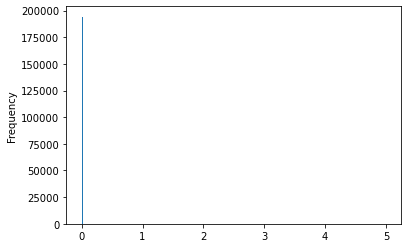

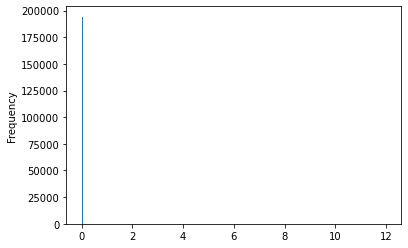

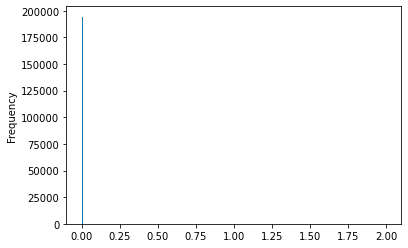

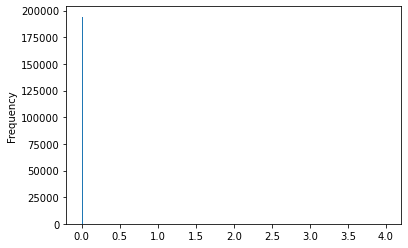

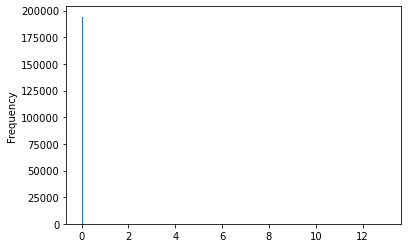

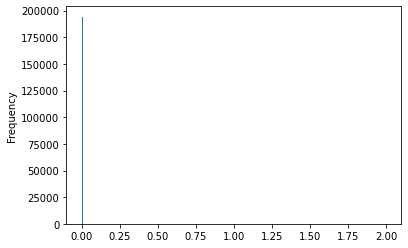

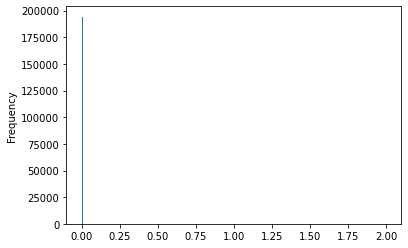

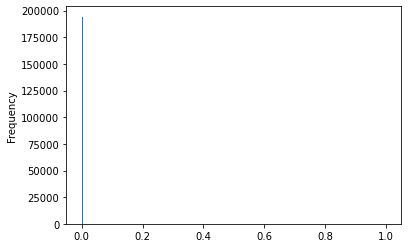

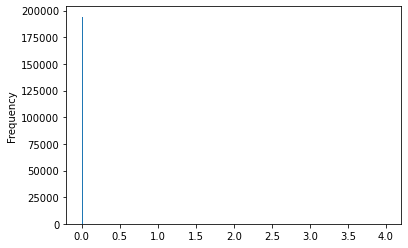

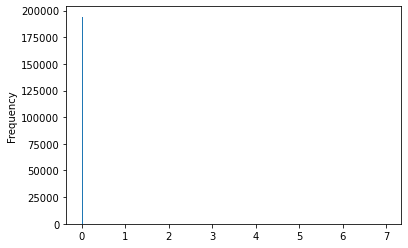

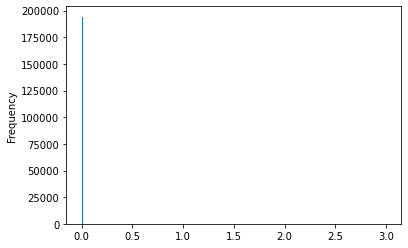

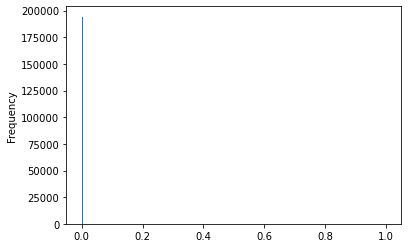

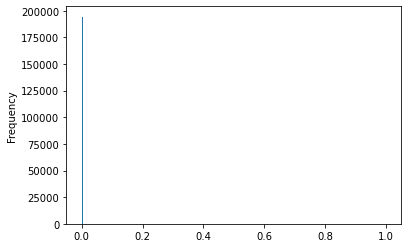

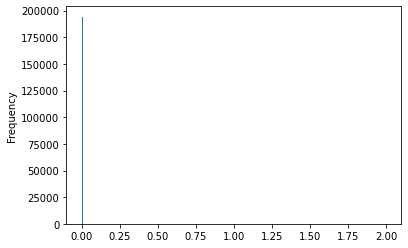

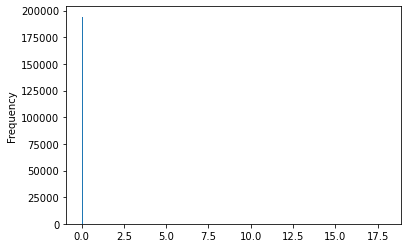

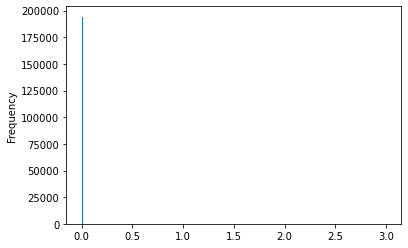

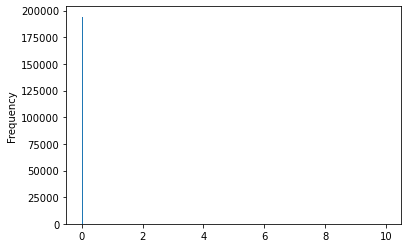

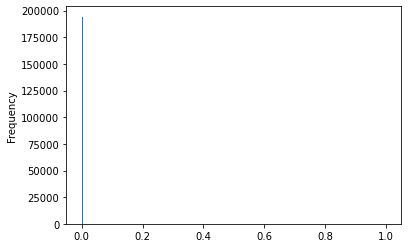

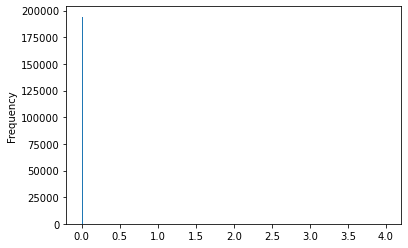

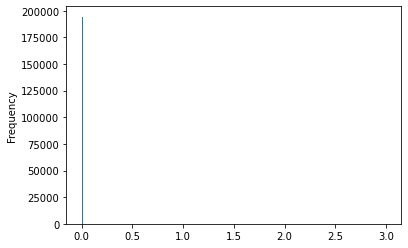

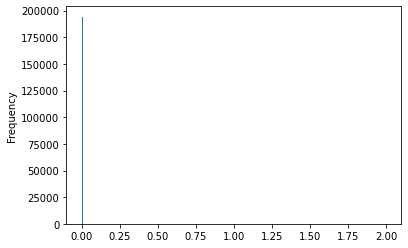

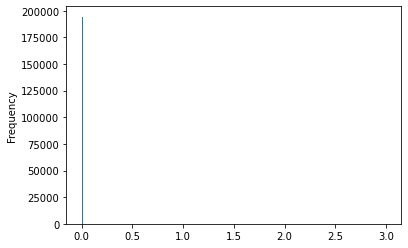

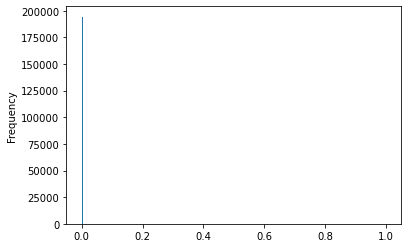

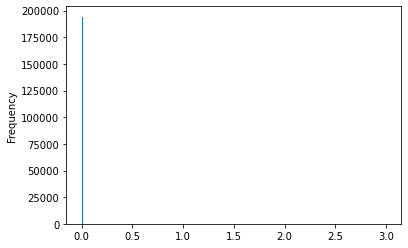

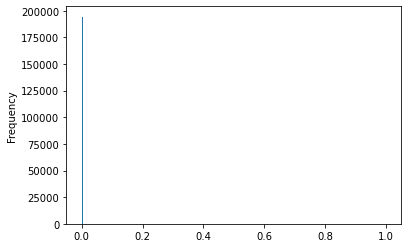

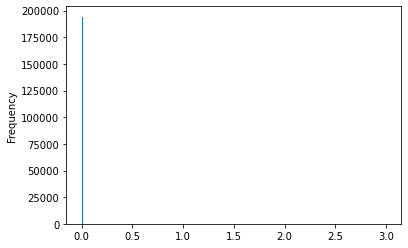

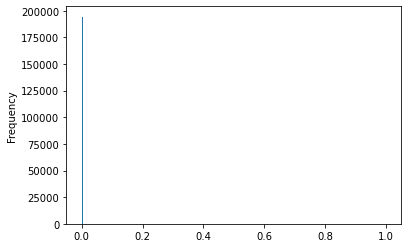

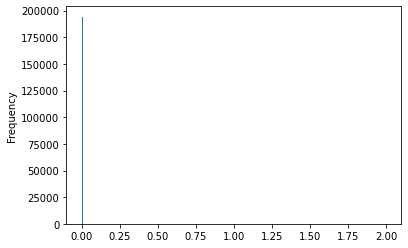

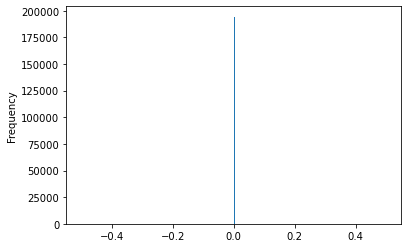

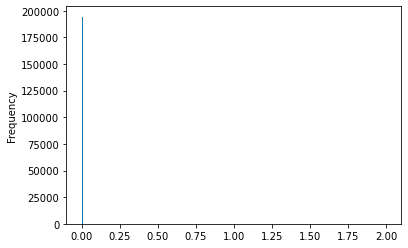

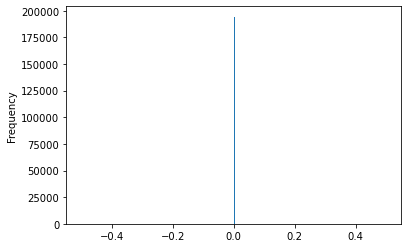

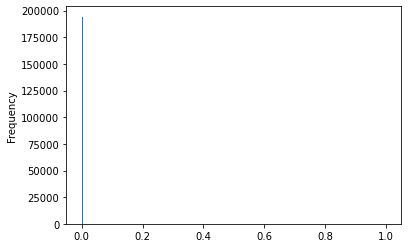

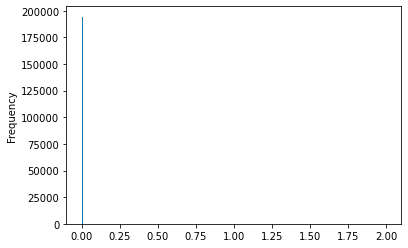

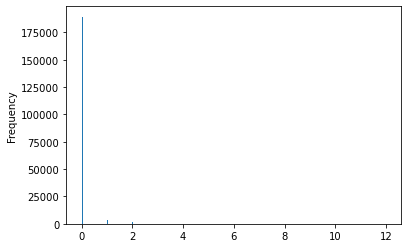

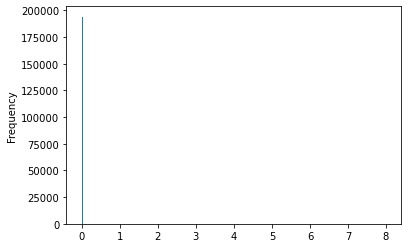

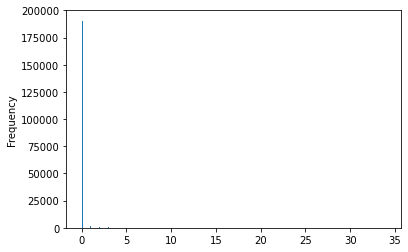

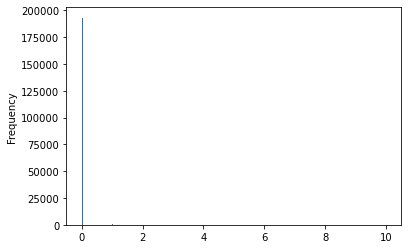

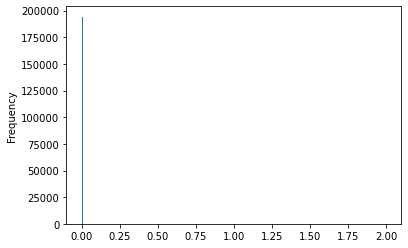

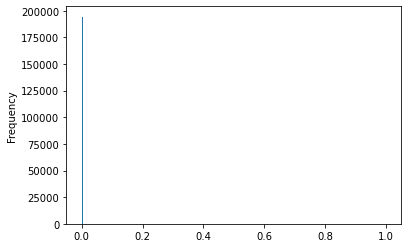

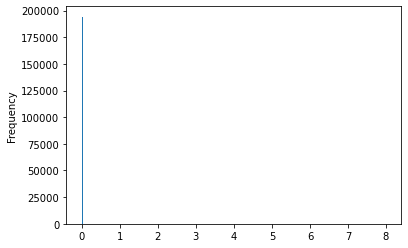

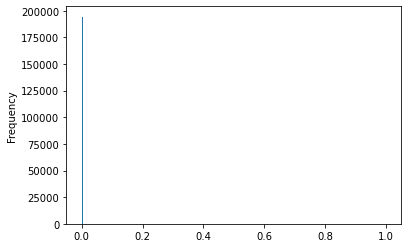

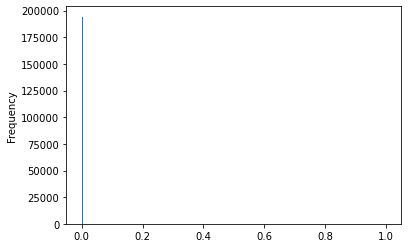

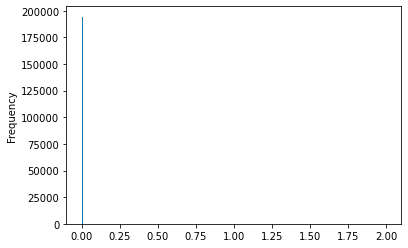

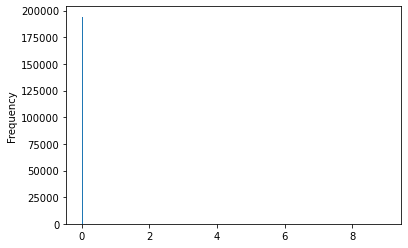

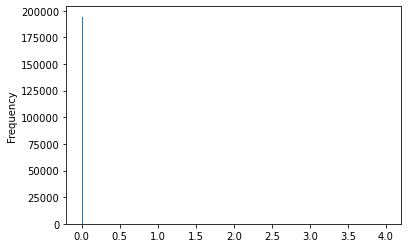

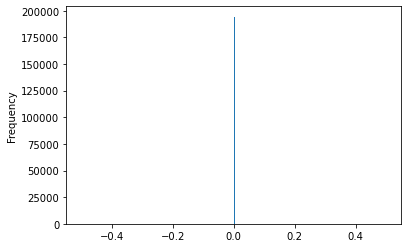

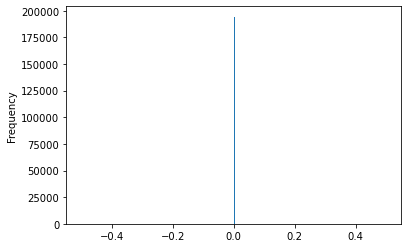

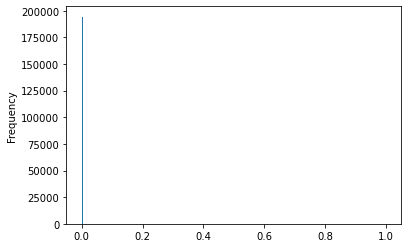

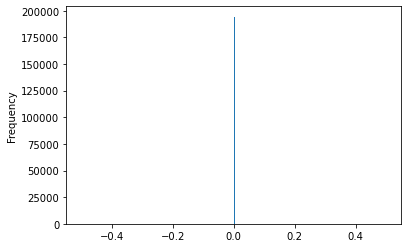

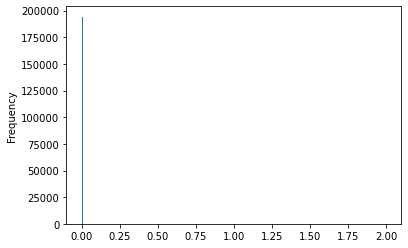

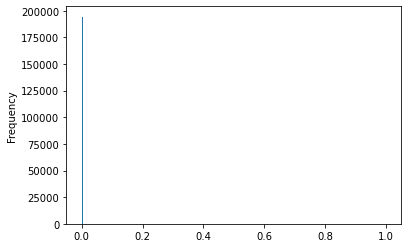

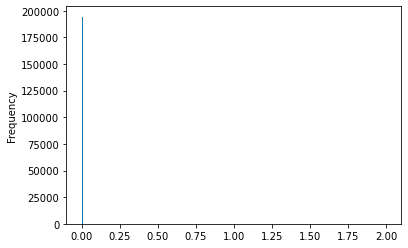

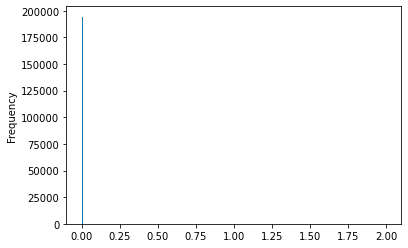

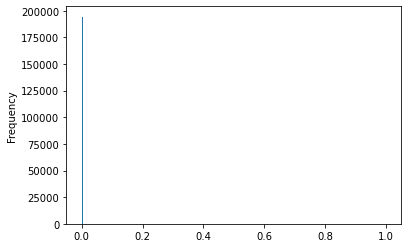

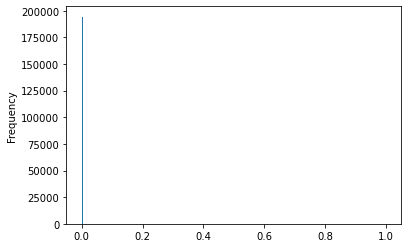

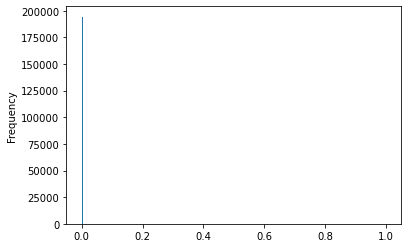

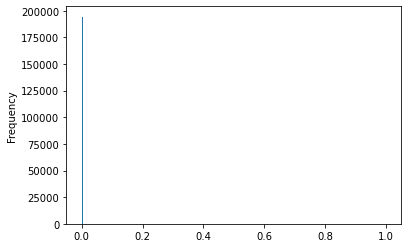

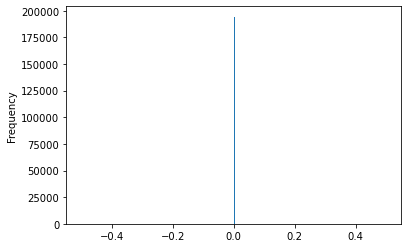

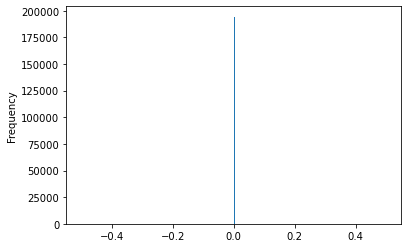

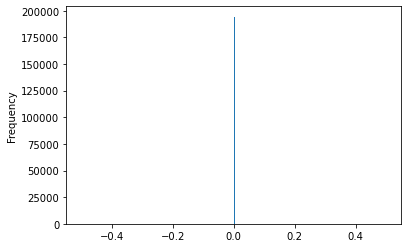

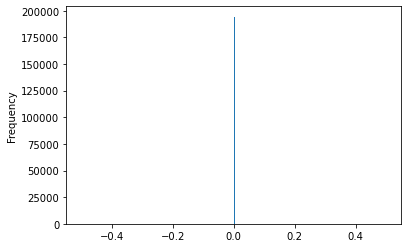

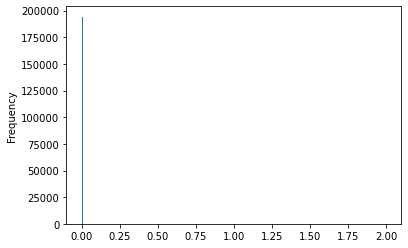

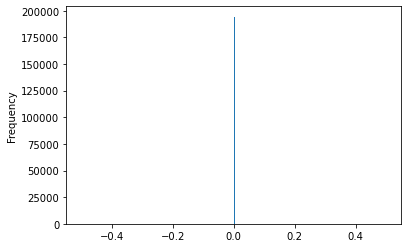

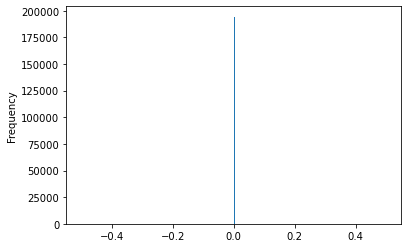

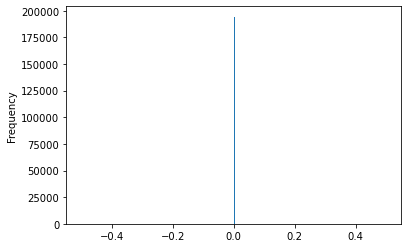

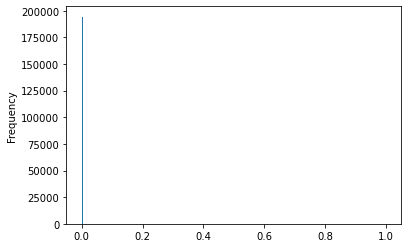

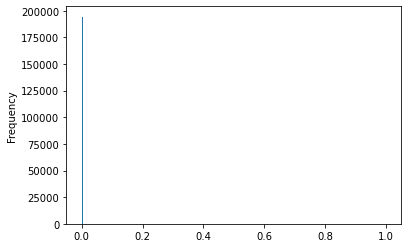

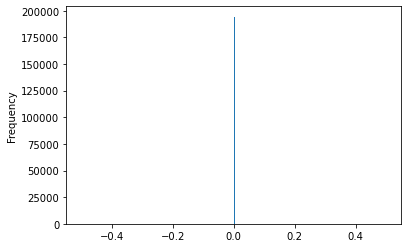

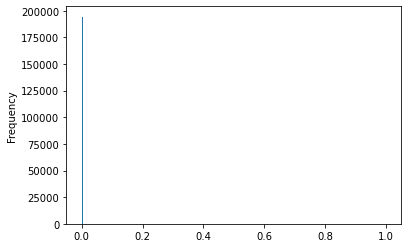

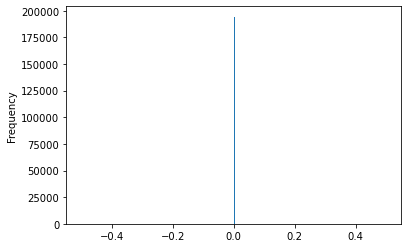

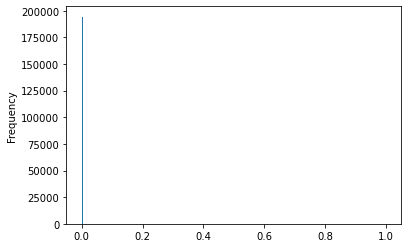

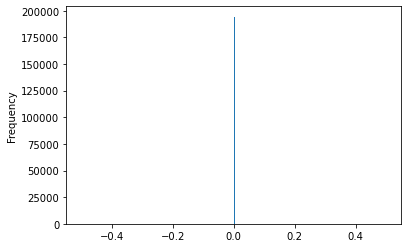

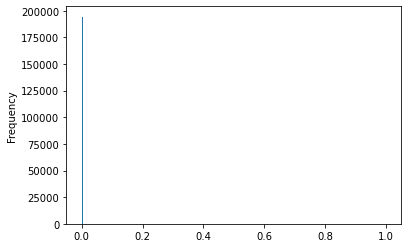

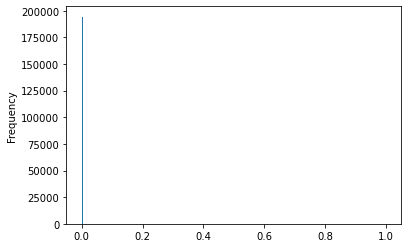

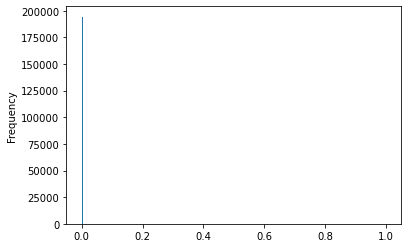

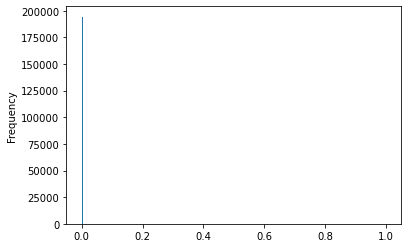

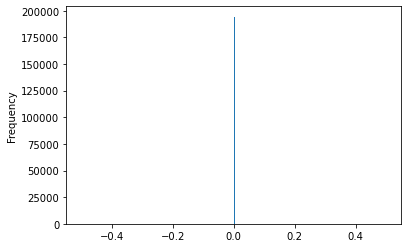

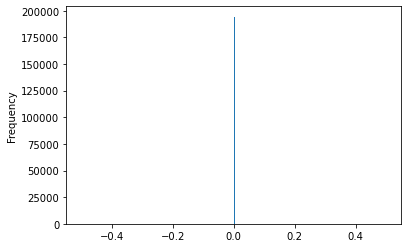

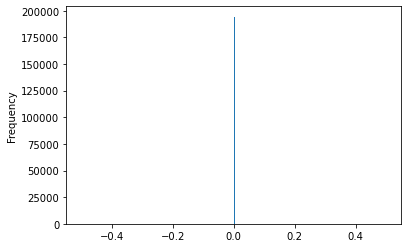

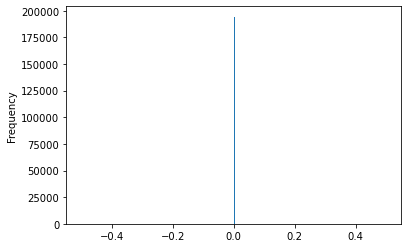

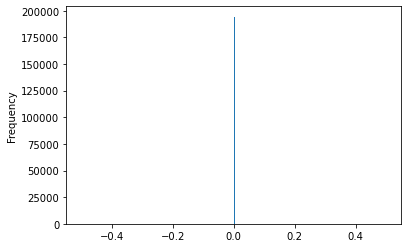

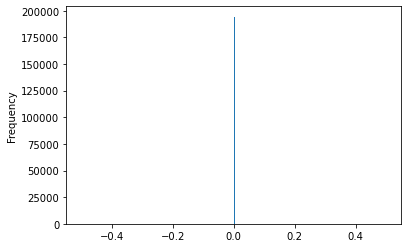

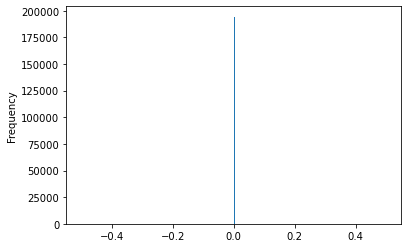

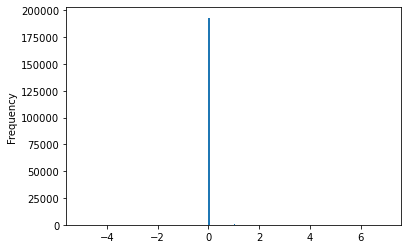

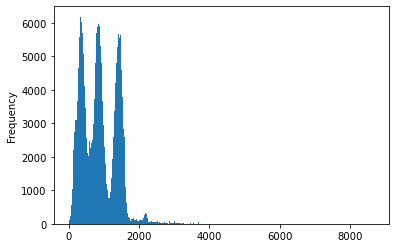

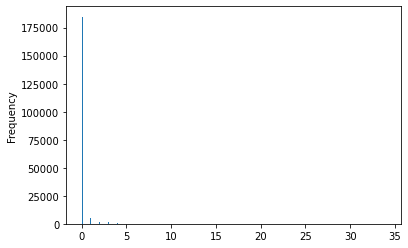

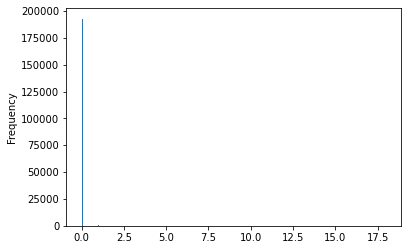

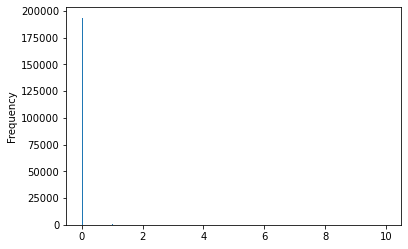

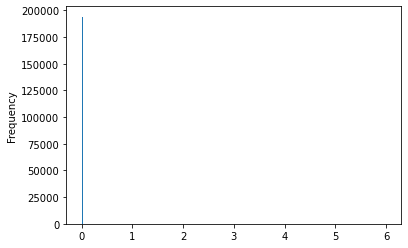

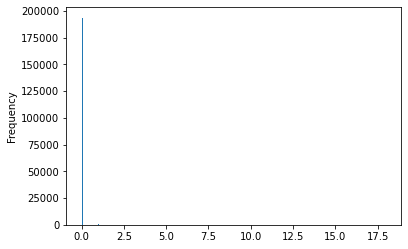

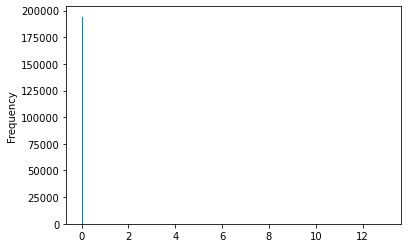

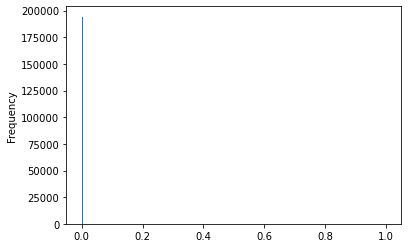

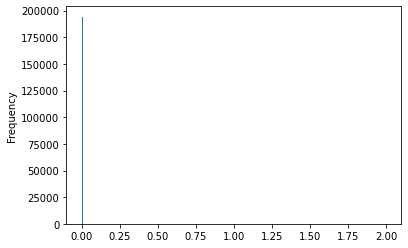

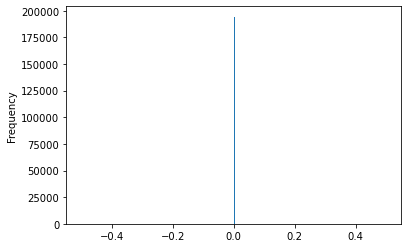

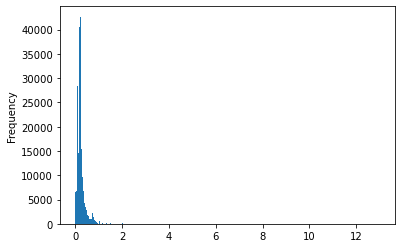

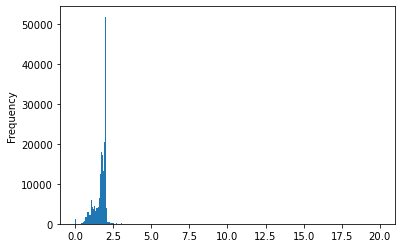

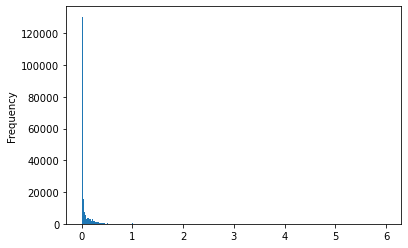

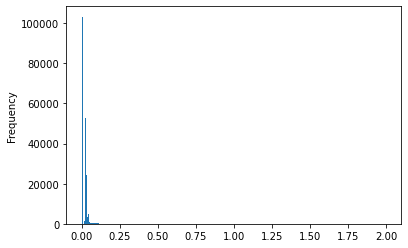

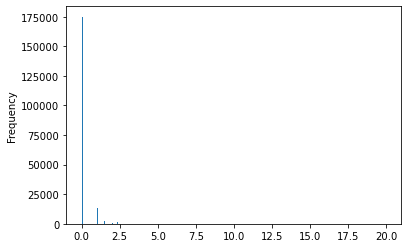

In [22]:
%matplotlib inline
for i in range(len(feature_names)):
    X_train_df.iloc[:, i].plot.hist(bins=300)
    plt.show()

In [8]:
scaler = MinMaxScaler(feature_range=(0,1), )
scaler.fit(X_train)
pickle.dump(scaler, open('Dataset/fitted_scaler.pkl', 'wb'))

In [43]:
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)
pickle.dump(X_train_scal, open(f'Dataset/X_train_scal.pkl', 'wb'))
pickle.dump(X_test_scal, open(f'Dataset/X_test_scal.pkl', 'wb'))